In [16]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
import torch
import os
import networkx as nx

In [17]:
#results_dir = "../experiments/outputs/2021-07-26_07-14_dist_mnsit_postfix_rho"
#results_dir = "../experiments/outputs/2021-07-26_10-47_dist_mnist_cadmm_scaled_v_const" 
results_dir = "../results/2021-08-21_07-33_dist_mnist_dsgt_vs_cadmm"
solo_dir = "../results/2021-09-04_16-01_dist_mnist_v3"
results_dir = "../results/2021-09-05_14-27_dist_mnist_v3"

results_a = torch.load(os.path.join(results_dir, "cadmm_results.pt"), map_location=torch.device("cpu")) 
results_b = torch.load(os.path.join(results_dir, "dsgt_results.pt"), map_location=torch.device("cpu"))
results_c = torch.load(os.path.join(results_dir, "dsgd_results.pt"), map_location=torch.device("cpu"))
results_solo = torch.load(os.path.join(solo_dir, "solo_results.pt"), map_location=torch.device("cpu"))

# Communication Graph

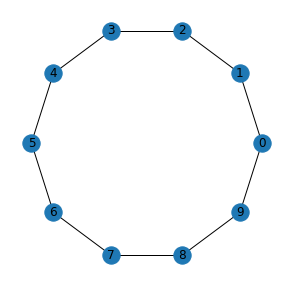

In [18]:
G = nx.read_gpickle(os.path.join(results_dir, "graph.gpickle"))

(fig, ax) = plt.subplots(figsize=(5, 5))
nx.draw_kamada_kawai(G, with_labels=True)

# Validation loss and accuracy results

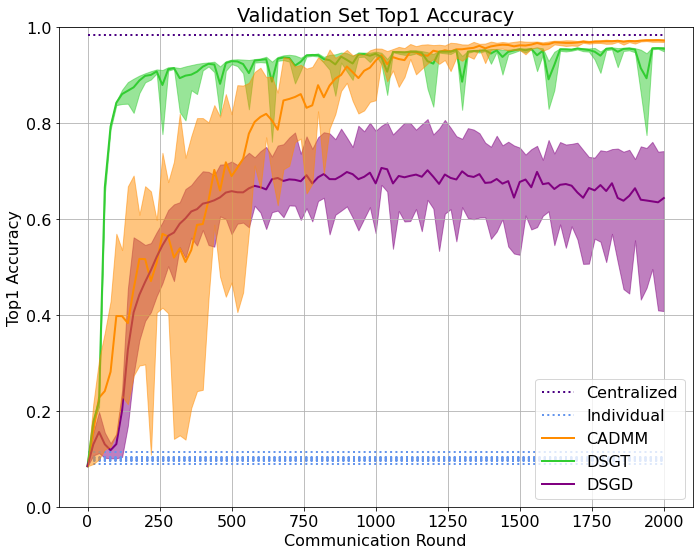

In [19]:
vla = torch.stack(results_a["validation_loss"])
vlb = torch.stack(results_b["validation_loss"])
vlc = torch.stack(results_c["validation_loss"])

aca = torch.stack(results_a["top1_accuracy"])
acb = torch.stack(results_b["top1_accuracy"])
acc = torch.stack(results_c["top1_accuracy"])

#(fig, (ax0, ax1)) = plt.subplots(ncols=2, figsize=(20, 8))
(fig, ax1) = plt.subplots(figsize=(10, 8), tight_layout=True)

#ax0.plot(vla, c="deepskyblue")
#ax0.fill_between(np.arange(vla.shape[0]), torch.amax(vla, dim=1), torch.amin(vla, dim=1), color="deepskyblue", alpha=0.5, label="cadmm")
#ax0.plot(vlb, c="indianred")
#ax0.fill_between(np.arange(vlb.shape[0]), torch.amax(vlb, dim=1), torch.amin(vlb, dim=1), color="indianred", alpha=0.5, label="dsgt")
#ax0.plot(vlc, c="springgreen")
#ax0.fill_between(np.arange(vlc.shape[0]), torch.amax(vlc, dim=1), torch.amin(vlc, dim=1), color="springgreen", alpha=0.5, label="dsgd")
##ax0.set_ylim((0.0, torch.amax(torch.amax(vl_r1))))
#ax0.legend()
#ax0.set_title("Validation set NLL Loss")
#ax0.set_xlabel("Checkpoint ID")
#ax0.set_ylabel("NLL Loss")
t = torch.arange(aca.shape[0]) * 20
cadmm_color="darkorange"
dsgt_color="limegreen"
dsgd_color="purple"
cent_color="indigo"
solo_color="cornflowerblue"

cent_acc = 0.985
ax1.plot(t, cent_acc * torch.ones_like(t), c=cent_color,
    linewidth=2, linestyle=":", label="Centralized")

for i in range(9):
    ax1.plot(t, results_solo[i]["validation_accuracy"] * np.ones_like(t),
        linewidth=2, color=solo_color, linestyle=":")
ax1.plot(t, results_solo[9]["validation_accuracy"] * np.ones_like(t),
    linewidth=2, color=solo_color, label="Individual", linestyle=":")

ax1.plot(t, torch.mean(aca, dim=1), c=cadmm_color, linewidth=2, label="CADMM")
ax1.fill_between(t, torch.amax(aca, dim=1), torch.amin(aca, dim=1),
    color=cadmm_color, alpha=0.5, zorder=3)

ax1.plot(t, torch.mean(acb, dim=1), c=dsgt_color, linewidth=2, label="DSGT")
ax1.fill_between(t, torch.amax(acb, dim=1), torch.amin(acb, dim=1),
    color=dsgt_color, alpha=0.5, zorder=2)

ax1.plot(t, torch.mean(acc, dim=1), c=dsgd_color, linewidth=2, label="DSGD")
ax1.fill_between(t, torch.amax(acc, dim=1), torch.amin(acc, dim=1),
    color=dsgd_color, alpha=0.5, zorder=1)

ax1.set_ylim((0.0, 1.0))
ax1.legend(loc=4)
ax1.set_title("Validation Set Top1 Accuracy")
ax1.set_xlabel("Communication Round")
ax1.set_ylabel("Top1 Accuracy")
ax1.grid(zorder=0)

fig.savefig("mnist_acc.svg")

# Consensus Error

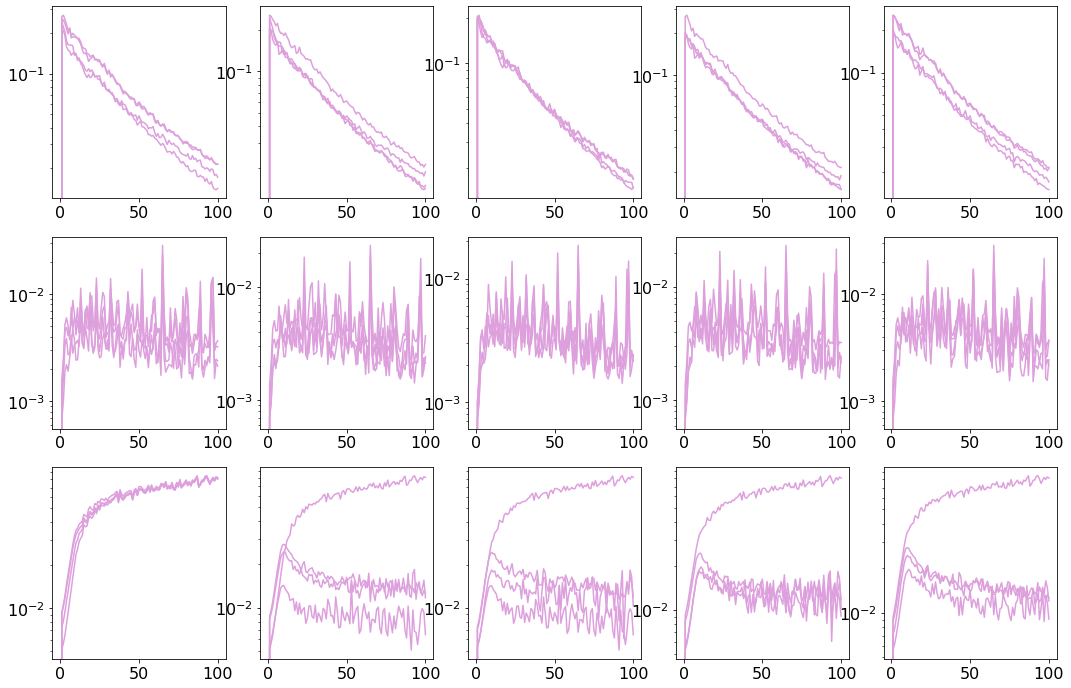

In [20]:
N = 5
(fig, axs) = plt.subplots(ncols=N, nrows=3, figsize=(18, 12))

cea = torch.stack(results_a["consensus_error"])
ceb = torch.stack(results_b["consensus_error"])
cec = torch.stack(results_c["consensus_error"])

ce = [cea, ceb, cec]

for j in range(3):
    for i in range(N):
        for k in range(N):
            if i != k:
                axs[j, i].plot(ce[j][:, i, k], c="plum")
                axs[j, i].set_yscale("log")

In [21]:
acc

tensor([[0.0847, 0.0847, 0.0847,  ..., 0.0847, 0.0847, 0.0847],
        [0.1291, 0.1180, 0.1122,  ..., 0.1410, 0.1545, 0.1345],
        [0.1231, 0.1379, 0.1519,  ..., 0.1808, 0.1583, 0.1121],
        ...,
        [0.4960, 0.7612, 0.5592,  ..., 0.6668, 0.6270, 0.6401],
        [0.4097, 0.7284, 0.6039,  ..., 0.6808, 0.5799, 0.6547],
        [0.4083, 0.7419, 0.6918,  ..., 0.6816, 0.6130, 0.6521]],
       dtype=torch.float64)